# Spaceship Titanic 생존(Transported) 예측: EDA 기반 전처리 및 베이스라인 모델

본 프로젝트는 Kaggle Spaceship Titanic 데이터셋을 활용하여 승객이 시공간 이상현상으로 인해 다른 차원으로 이동했는지 여부(Transported: True/False)를 예측하는 이진 분류 문제를 다룬다.

탐색적 데이터 분석(EDA)을 통해 결측치 분포와 변수 특성을 확인하고, 이를 바탕으로 결측치 처리 및 파생변수 생성 등 전처리를 수행하였다. 이후 베이스라인 모델을 학습하고 성능을 평가하여, 모델 결과로부터 주요 영향 요인을 해석하고 인사이트를 도출하였다. 최종적으로 Kaggle 제출 형식에 맞는 예측 결과를 생성하고 정확도 개선 방향을 정리하였다.

목차 
1. 데이터 확인 & EDA
2. EDA (탐색적 데이터 분석)
3. 데이터 전처리 (Preprocessing)
4. 모델링 및 학습 (Modeling) — 목표 0.805+
5. 피처 엔지니어링 (Feature Engineering)
6. 제출 파일 생성 (submission.csv)
7. 회고

## Titanic 생존자 예측
### ① 데이터 확인 & EDA

다음 데이터셋을 이용하였습니다.
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd

train = pd.read_csv("spaceship-titanic/train.csv")
test  = pd.read_csv("spaceship-titanic/test.csv")

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
print(train.shape)
print(train.isnull().sum().sort_values(ascending=False).head(10))
print(train['Transported'].value_counts(normalize=True))

(8693, 14)
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
dtype: int64
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


### 1-1. 데이터 확인

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
submission = pd.read_csv("spaceship-titanic/sample_submission.csv")
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
print(train.shape)  #(8693, 14)
print(test.shape)  #(4277, 13)

submission.head()

(8693, 14)
(4277, 13)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


### 1-2. train data, test data의 결측치를 확인

In [7]:
train.isnull().sum()
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
# 결측 비율
(train.isnull().mean() * 100).sort_values(ascending=False).head(10)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
Spa             2.105142
FoodCourt       2.105142
Destination     2.093639
dtype: float64

결측치가 특정 컬럼에만 몰려 있지 않고 HomePlanet, Cabin, Age, 지출 관련 변수 등 여러 변수에 분산되어 있었다. 따라서 단순 행 삭제는 데이터 손실이 커질 수 있어, 각 변수의 성격에 맞는 대체(Imputation) 및 피처 엔지니어링을 적용한다.

### 1-3. 결측치 시각화

In [9]:
!pip install -q missingno

<Axes: >

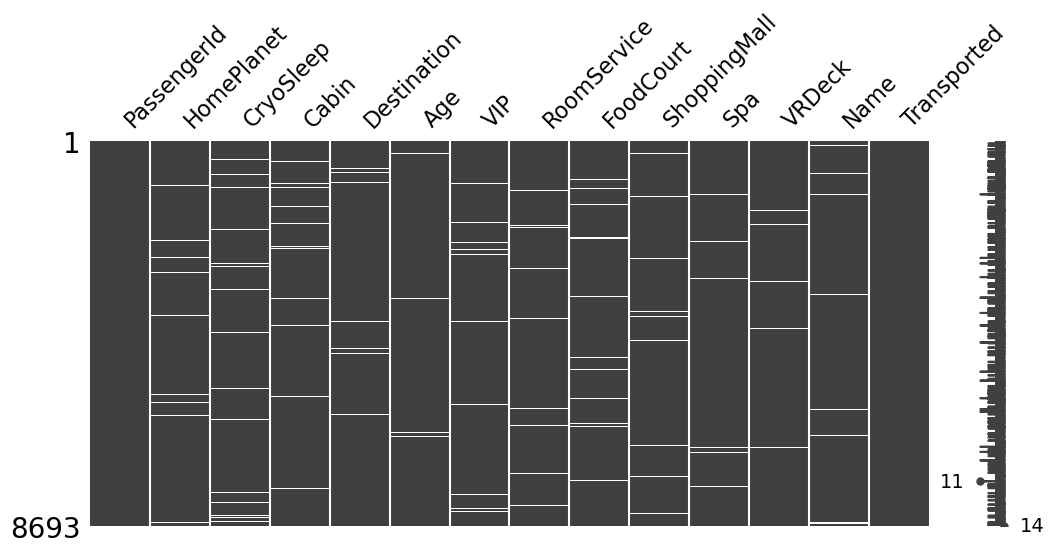

In [10]:
import missingno as msno
msno.matrix(train, figsize=(12, 5))

missingno matrix를 통해 결측치가 특정 행에 몰려있기보다는 여러 컬럼에 분산되어 존재함을 재확인하였다.

<Axes: >

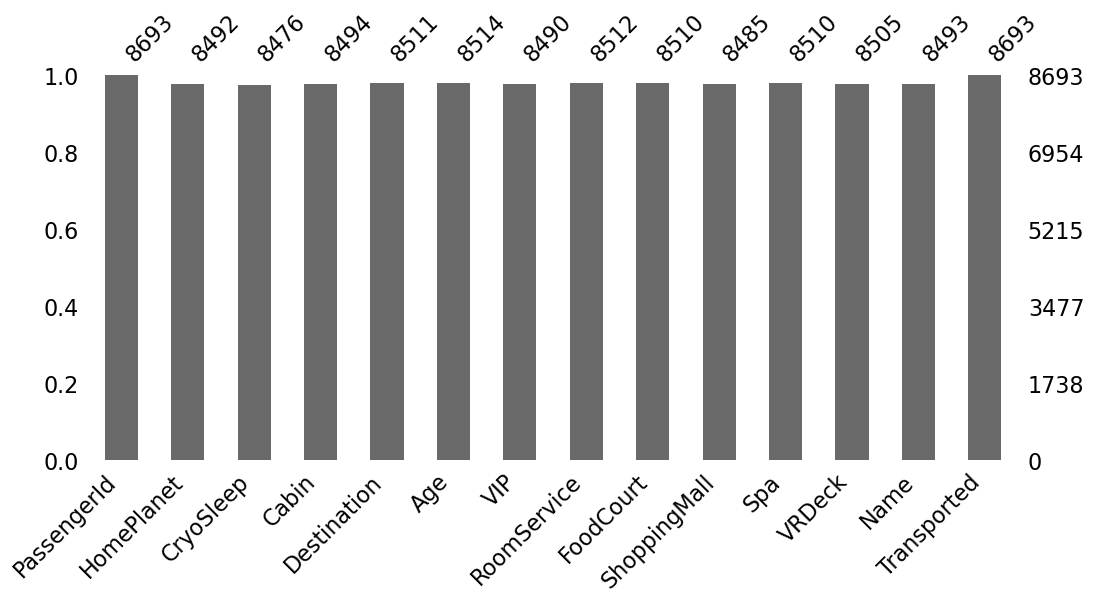

In [11]:
msno.bar(train, figsize=(12, 5))

---

## EDA (탐색적 데이터 분석)
### 2-1. target 변수 ( Survived )

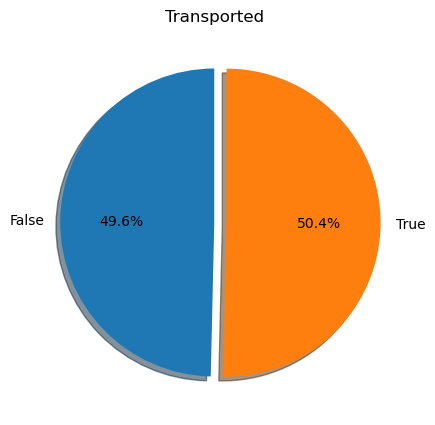

In [12]:
import matplotlib.pyplot as plt

counts = train["Transported"].value_counts().reindex([False, True])

plt.figure(figsize=(8, 5))
plt.pie(
    counts,
    labels=['False', 'True'],
    explode=[0, 0.08],
    shadow=True,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Transported")
plt.show()

Transported(True) 비율은 49.6%, Transported(False) 비율은 50.4%로, 절반에 가까운 탑승객이 이상현상으로 인해 다른 차원으로 이동한 것으로 확인된다.

### 2-2. CryoSleep 분석

이동 여부(Transported)를 가르는 핵심 변수

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64


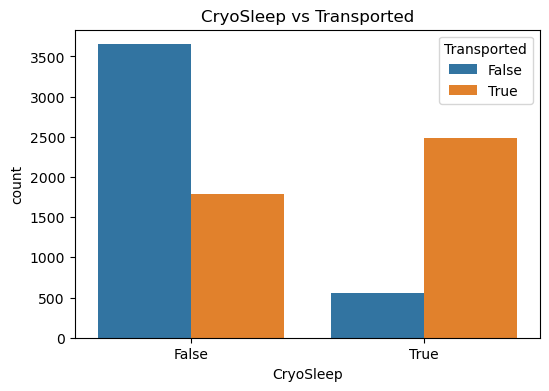

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# CryoSleep 분포 확인
print(train["CryoSleep"].value_counts(dropna=False))

# CryoSleep vs Transported (countplot)
plt.figure(figsize=(6,4))
sns.countplot(x="CryoSleep", hue="Transported", data=train)
plt.title("CryoSleep vs Transported")
plt.show()

# CryoSleep별 Transported 비율(평균)
print(train.groupby("CryoSleep")["Transported"].mean())


CryoSleep 여부에 따라 Transported 비율이 뚜렷하게 달라지는 경향이 관찰된다. 이는 동면 상태가 anomaly의 영향을 받는 조건과 연결되어 있을 가능성을 시사하며, CryoSleep은 예측 모델에서 핵심적인 역할을 할 수 있는 중요한 변수로 판단된다.

### 2-3. 집단별 특성 확인

HomePlanet과 Destination은 집단별 특성이 존재한다

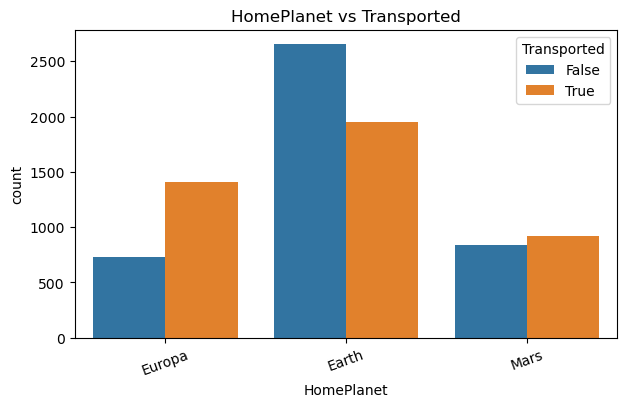

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64


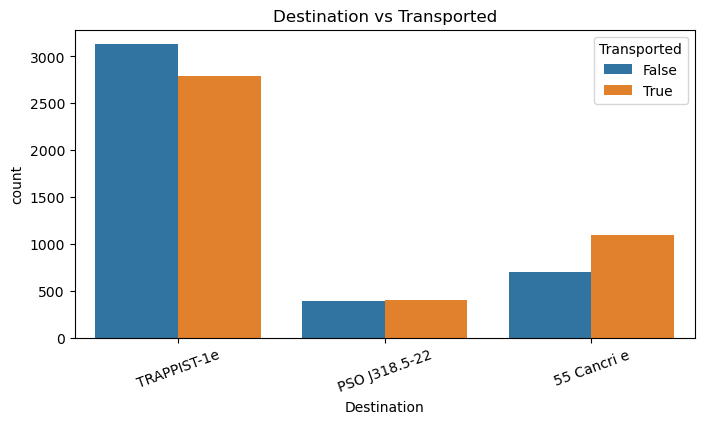

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64


In [14]:
# HomePlanet 분포 + Transported 관계
plt.figure(figsize=(7,4))
sns.countplot(x="HomePlanet", hue="Transported", data=train)
plt.title("HomePlanet vs Transported")
plt.xticks(rotation=20)
plt.show()

# HomePlanet별 Transported 비율
print(train.groupby("HomePlanet")["Transported"].mean())

# Destination 분포 + Transported 관계
plt.figure(figsize=(8,4))
sns.countplot(x="Destination", hue="Transported", data=train)
plt.title("Destination vs Transported")
plt.xticks(rotation=20)
plt.show()

# Destination별 Transported 비율
print(train.groupby("Destination")["Transported"].mean())

HomePlanet과 Destination에 따라 Transported 비율이 다르게 나타나 집단별 특성이 존재함을 확인할 수 있다. 이는 승객 구성이나 이동 경로 등 환경적 조건이 사건 영향과 연결되었을 가능성을 보여주며, 두 변수는 예측 모델에서 의미 있는 분류 기준으로 활용될 수 있다.

### 2-4. 이동 확률이 달라질 수 있는 집단의 확인

VIP는 ‘이동 확률이 달라질 수 있는 집단’이다

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


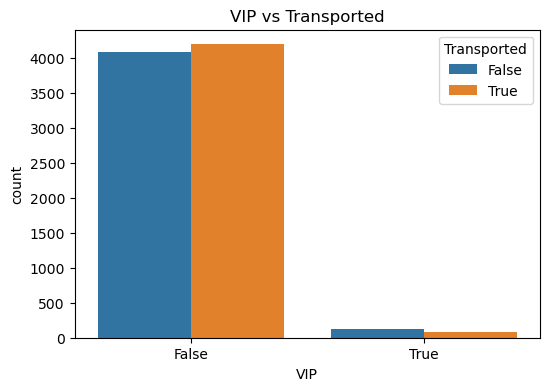

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


In [15]:
# VIP 분포 확인
print(train["VIP"].value_counts(dropna=False))

# VIP vs Transported (countplot)
plt.figure(figsize=(6,4))
sns.countplot(x="VIP", hue="Transported", data=train)
plt.title("VIP vs Transported")
plt.show()

# VIP별 Transported 비율
print(train.groupby("VIP")["Transported"].mean())

VIP 여부는 전체 비율 자체는 크지 않지만, Transported와의 관계에서 차이가 나타날 수 있다. VIP는 더 나은 서비스 이용이나 특정 구역(Cabin) 배정과 연결될 가능성이 있어, Cabin 및 지출 변수들과 함께 해석하면 더 높은 설명력을 가질 수 있다고 판단된다.

### 2-5. 지출 패턴의 시사점

지출 패턴은 ‘승객의 생활 방식(활동성)’을 보여주는 단서다

        RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count   8512.000000   8510.000000   8485.000000   8510.000000   8505.000000
mean     224.687617    458.077203    173.729169    311.138778    304.854791
std      666.717663   1611.489240    604.696458   1136.705535   1145.717189
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       47.000000     76.000000     27.000000     59.000000     46.000000
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000


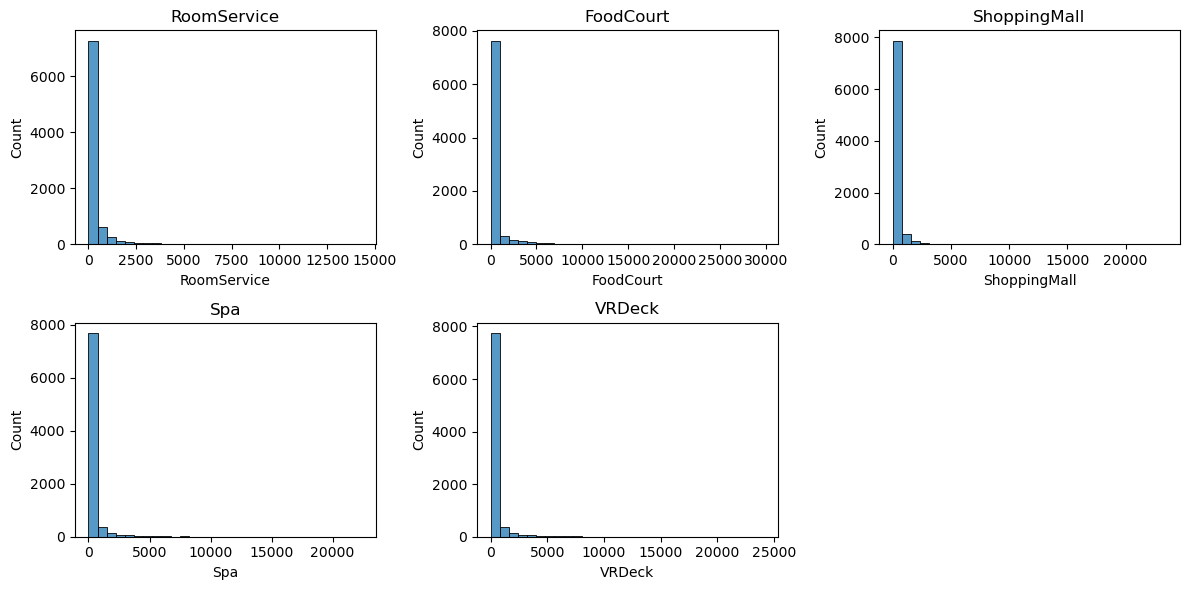

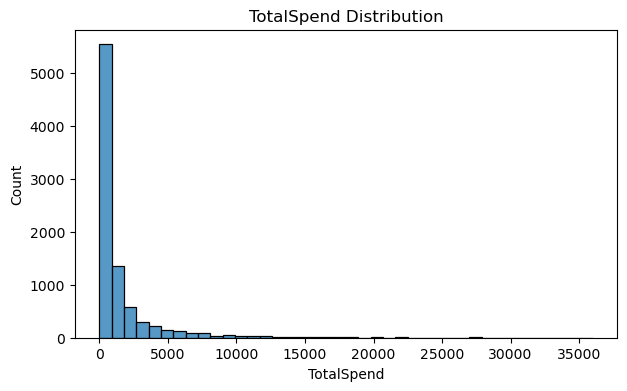

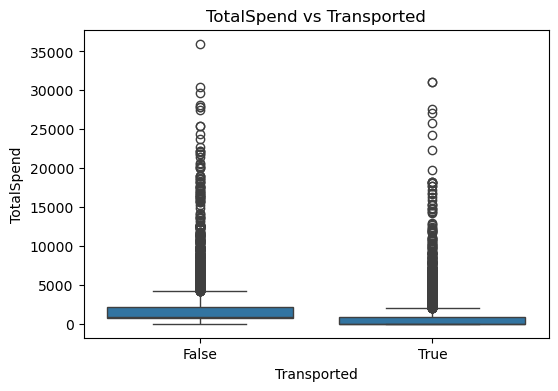

In [16]:
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# 지출 변수 기본 통계
print(train[spend_cols].describe())

# 지출 변수 분포(히스토그램)
plt.figure(figsize=(12, 6))
for i, col in enumerate(spend_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(train[col], bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# 총지출(TotalSpend) 파생변수 생성
train["TotalSpend"] = train[spend_cols].sum(axis=1)

# TotalSpend 분포 확인
plt.figure(figsize=(7,4))
sns.histplot(train["TotalSpend"], bins=40)
plt.title("TotalSpend Distribution")
plt.show()

# TotalSpend와 Transported 관계(박스플롯)
plt.figure(figsize=(6,4))
sns.boxplot(x="Transported", y="TotalSpend", data=train)
plt.title("TotalSpend vs Transported")
plt.show()

지출 관련 변수는 0에 가까운 값이 많은 치우친 분포를 보이며, 이는 일부 승객이 시설을 거의 이용하지 않았거나 특정 조건으로 소비 행동이 제한되었을 가능성을 시사한다. 여러 지출 변수를 합친 총지출(TotalSpend)을 생성하면 승객의 활동성을 더 직관적으로 반영할 수 있을 것으로 기대된다.

### 2-6. 위치 정보 확인

Cabin은 단순 문자열이 아니라 ‘위치 정보’로 해석할 수 있다

Cabin missing: 199
   Cabin Deck CabinNum Side
0  B/0/P    B        0    P
1  F/0/S    F        0    S
2  A/0/S    A        0    S
3  A/0/S    A        0    S
4  F/1/S    F        1    S


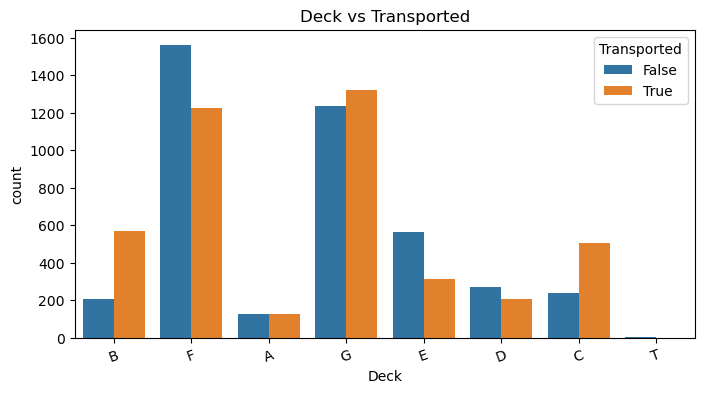

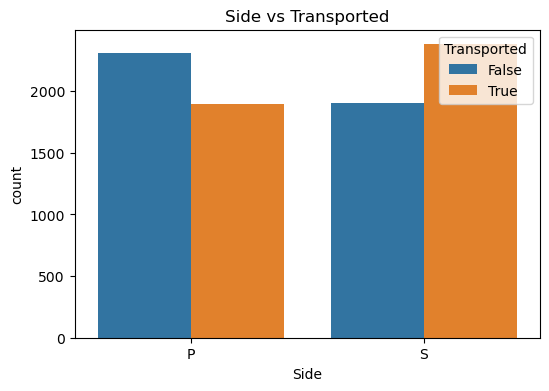

Deck
A    0.496094
B    0.734275
C    0.680054
D    0.433054
E    0.357306
F    0.439871
G    0.516217
T    0.200000
Name: Transported, dtype: float64


In [17]:
# Cabin 결측치 확인
print("Cabin missing:", train["Cabin"].isnull().sum())

# Cabin 분해(Deck/Num/Side)
cabin_split = train["Cabin"].str.split("/", expand=True)
train["Deck"] = cabin_split[0]
train["CabinNum"] = cabin_split[1]
train["Side"] = cabin_split[2]

# 분해 결과 확인
print(train[["Cabin", "Deck", "CabinNum", "Side"]].head())

# Deck vs Transported
plt.figure(figsize=(8,4))
sns.countplot(x="Deck", hue="Transported", data=train)
plt.title("Deck vs Transported")
plt.xticks(rotation=20)
plt.show()

# Side vs Transported
plt.figure(figsize=(6,4))
sns.countplot(x="Side", hue="Transported", data=train)
plt.title("Side vs Transported")
plt.show()

# Deck별 Transported 비율
print(train.groupby("Deck")["Transported"].mean())

Cabin 값은 결측치가 존재하지만, 유효한 값은 Deck/Num/Side로 분해 가능하다. 이는 Cabin이 승객의 위치 정보를 담고 있을 수 있음을 의미하며, anomaly가 특정 구역에 더 큰 영향을 미쳤다면 Deck/Side 정보는 예측에 중요한 특징이 될 수 있다.

## EDA 기반 인사이트 정리

종합하면, 본 데이터에서는 CryoSleep, HomePlanet, Destination 등에서 Transported 여부가 달라지는 경향이 관찰되었고, 지출 변수는 승객의 활동성을 반영하는 지표로 활용 가능하다고 판단된다. 또한 결측치는 특정 행에 몰려있기보다 여러 변수에 분산되어 존재하므로, 단순 삭제보다는 적절한 결측치 대체 및 파생변수 생성 전략이 필요하다. 이러한 관찰을 바탕으로 이후 전처리 및 모델링 단계에서는 Cabin 분해, 총지출 파생변수 생성, 범주형 인코딩을 적용하여 성능을 개선하고자 한다.

---

## 3. 데이터 전처리 (Preprocessing)

목표: 모델이 학습할 수 있도록 결측치를 정리하고, 중요한 정보만 남기는 단계

### 3-1. 불필요 컬럼 처리 및 데이터 정리

In [18]:
# target 분리
y = train["Transported"].astype(int)
X = train.drop(columns=["Transported"]).copy()
test_prep = test.copy()

print(X.shape, test_prep.shape)

(8693, 17) (4277, 13)


예측해야 하는 정답(Transported)은 따로 분리하고, 나머지 컬럼을 입력 데이터(X)로 구성했다.

### 3.2 결측치 처리 전략 및 근거

In [19]:
# 결측치 현황 확인(전처리 전)
missing_before = X.isnull().sum().sort_values(ascending=False)
print(missing_before[missing_before > 0])

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Side            199
CabinNum        199
Deck            199
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
dtype: int64


결측치 채우기(수치형/범주형)

In [20]:
# 수치형: 중앙값으로 채우기
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for col in num_cols:
    med = X[col].median()
    X[col] = X[col].fillna(med)
    test_prep[col] = test_prep[col].fillna(med)

# 범주형: Unknown으로 채우기
cat_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

for col in cat_cols:
    X[col] = X[col].fillna("Unknown")
    test_prep[col] = test_prep[col].fillna("Unknown")

결측치 처리 후 확인

In [21]:
missing_after = X.isnull().sum().sort_values(ascending=False)
print(missing_after[missing_after > 0])

Side        199
CabinNum    199
Deck        199
dtype: int64


결측치는 여러 변수에 분산되어 있어 단순 삭제보다 대체 방식이 적절하다고 판단했다.
수치형 변수는 이상치 영향을 줄이기 위해 평균보다 중앙값을 사용했고,
주형 변수는 결측 자체도 하나의 정보가 될 수 있어 Unknown으로 통일한다.

### 3.3 범주형 인코딩(Encoding)

In [22]:
for df in [X, test_prep]:
    df["GroupID"] = df["PassengerId"].astype(str).str.split("_").str[0]

# train+test를 합쳐서 그룹 크기 계산(둘 중 한쪽에만 있는 GroupID 대비)
all_group = pd.concat([
    X[["GroupID"]].assign(_src="train"),
    test_prep[["GroupID"]].assign(_src="test")
], axis=0)

group_size_map = all_group["GroupID"].value_counts()

for df in [X, test_prep]:
    df["GroupSize"] = df["GroupID"].map(group_size_map).fillna(1).astype(int)
    df["IsAlone"] = (df["GroupSize"] == 1).astype(int)

In [23]:
# 범주형 컬럼만 모아서 확인
cat_cols_for_encoding = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]

# train + test를 합쳐서 더미화(인코딩 컬럼 맞추기)
all_data = pd.concat([X, test_prep], axis=0)

all_encoded = pd.get_dummies(all_data, columns=cat_cols_for_encoding, drop_first=True)

# 다시 train/test로 분리
X_encoded = all_encoded.iloc[:len(X)].copy()
test_encoded = all_encoded.iloc[len(X):].copy()

print(X_encoded.shape, test_encoded.shape)

(8693, 22478) (4277, 22478)


머신러닝 모델이 문자열 범주형 데이터를 그대로 이해하지 못하므로,
One-Hot Encoding(더미 변수) 방식으로 숫자 형태로 변환했다.

train과 test를 합쳐서 인코딩하면 컬럼 구조가 동일하게 유지되어 오류를 방지할 수 있다.

### 3.4 스케일링/정규화(생략)

본 프로젝트에서는 모델 후보로 트리 기반 모델을 고려하여, 스케일링은 필수 단계가 아니므로 생략하였다.

In [24]:
print("전처리 완료!")
print("X_encoded:", X_encoded.shape)
print("test_encoded:", test_encoded.shape)

X_encoded.head()

전처리 완료!
X_encoded: (8693, 22478)
test_encoded: (4277, 22478)


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,Deck,CabinNum,...,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zosmas Reswiress,Name_Zubeneb Camaxler,Name_Zubeneb Flesping,Name_Zubeneb Pasharne,Name_Zubens Blentrary,Name_Zubens Peterive
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,...,False,False,False,False,False,False,False,False,False,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,736.0,F,0,...,False,False,False,False,False,False,False,False,False,False
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0,A,0,...,False,False,False,False,False,False,False,False,False,False
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,A,0,...,False,False,False,False,False,False,False,False,False,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,F,1,...,False,False,False,False,False,False,False,False,False,False


결측치 처리 및 인코딩을 적용한 후, 모델이 학습 가능한 형태의 최종 입력 데이터로 변환되었음을 확인하였다.

---

## 4. 피처 엔지니어링 (Feature Engineering)

### 4.1 Cabin 분해 (Deck / Side)

Cabin은 "B/0/P" 같은 문자열인데, 이걸 그대로 쓰면 너무 복잡하므로
대신 Deck(층/구역), Side(좌/우)로 나누어 “위치 정보”를 깔끔하게 한다.

In [25]:
# Cabin -> Deck, Side 분해 함수
def split_cabin(df):
    cabin_split = df["Cabin"].astype(str).str.split("/", expand=True)
    df["Deck"] = cabin_split[0]
    df["Side"] = cabin_split[2]
    return df

# X, test_prep에 적용 (전처리 단계에서 만든 변수 기준)
X = split_cabin(X)
test_prep = split_cabin(test_prep)

# 결측 보정(혹시 Cabin이 Unknown/NaN이면)
X["Deck"] = X["Deck"].replace("nan", "Unknown").fillna("Unknown")
X["Side"] = X["Side"].replace("nan", "Unknown").fillna("Unknown")

test_prep["Deck"] = test_prep["Deck"].replace("nan", "Unknown").fillna("Unknown")
test_prep["Side"] = test_prep["Side"].replace("nan", "Unknown").fillna("Unknown")

# 확인
X[["Cabin", "Deck", "Side"]].head()


,Cabin,Deck,Side
0,B/0/P,B,P
1,F/0/S,F,S
2,A/0/S,A,S
3,A/0/S,A,S
4,F/1/S,F,S


Cabin을 Deck/Side로 분해하여 탑승객의 위치 정보를 더 단순하고 명확한 형태로 변환하였다.

이를 통해 “특정 구역에 더 많은 이동(Transported)이 발생했는지”를 모델이 학습할 수 있게 했다.

### 4.2 TotalSpend(총지출) 추가

RoomService, FoodCourt, Spa 등을 각각 보는 것보다
한 사람이 얼마나 활동적으로 소비했는지를 한 번에 보여주는 값이 더 직관적이므로 진행한다.

In [26]:
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for df in [X, test_prep]:
    df.loc[df["CryoSleep"].astype(str) == "True", spend_cols] = 0
    df["NoSpend"] = (df[spend_cols].sum(axis=1) == 0).astype(int)
    df["TotalSpend"] = df[spend_cols].sum(axis=1)

In [27]:
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# 총지출 파생변수 생성
X["TotalSpend"] = X[spend_cols].sum(axis=1)
test_prep["TotalSpend"] = test_prep[spend_cols].sum(axis=1)

# 확인
X[spend_cols + ["TotalSpend"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0,736.0
2,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,303.0,70.0,151.0,565.0,2.0,1091.0


여러 지출 변수를 합쳐 TotalSpend를 생성하여 “승객의 활동 수준(소비 규모)”을 하나의 변수로 반영하였다.

개별 지출 변수의 분산된 정보를 통합해 모델 입력을 단순화하고 설명력을 높이고자 했다.

### 4.3 (중요) 인코딩에 Deck/Side 포함해서 다시 만들기

3단계에서 더미 인코딩을 했으므로,
Deck/Side/TotalSpend가 추가된 상태로 다시 인코딩을 한 번 더 해줘야 한다.

In [28]:
# (추가 보정 1) CryoSleep 결측 논리 보정: 지출합 0이면 CryoSleep=True로 채우기
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for df in [X, test_prep]:
    spend_sum = df[spend_cols].sum(axis=1)
    mask = df["CryoSleep"].isna() | (df["CryoSleep"].astype(str) == "Unknown")
    df.loc[mask & (spend_sum == 0), "CryoSleep"] = "True"
    df.loc[mask & (spend_sum > 0), "CryoSleep"] = "False"

In [29]:
# 인코딩할 범주형 컬럼 목록 (Deck/Side 추가!)
cat_cols_for_encoding = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]

# Cabin/Name은 모델에 그대로 넣기 복잡하니까 제거(Deck/Side로 대체)
X_fe = X.drop(columns=["Cabin", "Name"])
test_fe = test_prep.drop(columns=["Cabin", "Name"])

# train+test 합쳐서 더미 인코딩
all_data = pd.concat([X_fe, test_fe], axis=0)
all_encoded = pd.get_dummies(all_data, columns=cat_cols_for_encoding, drop_first=True)

# 다시 분리
X_encoded = all_encoded.iloc[:len(X_fe)].copy()
test_encoded = all_encoded.iloc[len(X_fe):].copy()

print("X_encoded:", X_encoded.shape)
print("test_encoded:", test_encoded.shape)


X_encoded: (8693, 34)
test_encoded: (4277, 34)


Deck/Side를 새로 생성했기 때문에, 이를 모델 입력에 반영하기 위해 다시 인코딩을 수행하였다.

train/test를 합쳐 인코딩함으로써 컬럼 불일치 문제를 방지하였다.

---

## 5. 모델링 및 학습 (Modeling) — 목표 0.805+

### 5.1 모델 학습 준비 + 검증 데이터 분리

In [30]:
# 1) object(문자열) 컬럼 있는지 확인 + 제거
bad_obj = X_encoded.select_dtypes(include=["object"]).columns.tolist()
print("object cols in X_encoded:", bad_obj)

if len(bad_obj) > 0:
    X_encoded = X_encoded.drop(columns=bad_obj)
    test_encoded = test_encoded.drop(columns=bad_obj)
    
# 2) 결측치(NaN) 있는지 확인 + 0으로 채우기
print("NaN count (train):", X_encoded.isnull().sum().sum())
print("NaN count (test):", test_encoded.isnull().sum().sum())

X_encoded = X_encoded.fillna(0)
test_encoded = test_encoded.fillna(0)

# 3) 컬럼 불일치 사전 방지
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print("final shapes:", X_encoded.shape, test_encoded.shape)

object cols in X_encoded: ['PassengerId', 'CabinNum', 'GroupID']
NaN count (train): 0
NaN count (test): 0
final shapes: (8693, 31) (4277, 31)


In [31]:
# 중복 컬럼 제거 (LightGBM 에러 해결)
dup_cols = X_encoded.columns[X_encoded.columns.duplicated()].tolist()
print("중복 컬럼 개수:", len(dup_cols))
print("중복 예시:", dup_cols[:10])

# 중복 제거 (첫 번째만 남김)
X_encoded = X_encoded.loc[:, ~X_encoded.columns.duplicated()].copy()
test_encoded = test_encoded.loc[:, ~test_encoded.columns.duplicated()].copy()

# 혹시 train/test 컬럼이 어긋나면 맞추기
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print("정리 후 shape:", X_encoded.shape, test_encoded.shape)

중복 컬럼 개수: 1
중복 예시: ['CryoSleep_True']
정리 후 shape: (8693, 30) (4277, 30)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded, y, test_size=0.2, random_state=7, stratify=y
)

print(X_train.shape, X_valid.shape)

(6954, 30) (1739, 30)


### 5.2 LightGBM 모델 학습

In [78]:
# 문자열(object) 컬럼 제거
drop_cols = []
for col in ["PassengerId", "CabinNum"]:
    if col in X_encoded.columns:
        drop_cols.append(col)

X_encoded = X_encoded.drop(columns=drop_cols)
test_encoded = test_encoded.drop(columns=drop_cols)

print("Dropped:", drop_cols)
print(X_encoded.shape, test_encoded.shape)

Dropped: []
(8693, 30) (4277, 30)


In [79]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# model (정석)
lgbm = LGBMClassifier(
    n_estimators=5000,        # 크게 잡아도 early stopping이 멈춤
    learning_rate=0.02,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=7
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="binary_logloss",
    callbacks=[
        __import__("lightgbm").early_stopping(stopping_rounds=200, verbose=False)
    ]
)

valid_pred = lgbm.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, valid_pred))
print("Best iteration:", lgbm.best_iteration_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Validation Accuracy: 0.8108108108108109
Best iteration: 394


In [80]:
import numpy as np
from sklearn.metrics import accuracy_score

valid_proba = lgbm.predict_proba(X_valid)[:, 1]

best_th, best_acc = 0.5, 0
for th in np.arange(0.35, 0.66, 0.0025):   # ✅ 더 넓고 촘촘하게
    pred = (valid_proba >= th).astype(int)
    acc = accuracy_score(y_valid, pred)
    if acc > best_acc:
        best_acc, best_th = acc, th

print("Best threshold:", best_th)
print("Best valid acc:", best_acc)

Best threshold: 0.45500000000000007
Best valid acc: 0.816561242093157


### 5.3 검증 정확도 확인

In [66]:
valid_proba = lgbm.predict_proba(X_valid)[:, 1]
valid_pred = (valid_proba >= best_th).astype(int)

acc = accuracy_score(y_valid, valid_pred)
print("Validation Accuracy(best_th):", acc)

Validation Accuracy(best_th): 0.8154111558366878


---

## 6. 제출 파일 생성 (submission.csv)

In [81]:
test_pred = lgbm.predict(test_encoded)

submission = pd.read_csv("spaceship-titanic/sample_submission.csv")
submission["Transported"] = test_pred.astype(bool)

submission.to_csv("submission.csv", index=False)

submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [82]:
pd.read_csv("submission.csv").head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [87]:
import pandas as pd

test_proba = lgbm.predict_proba(test_encoded)[:, 1]
base = pd.read_csv("spaceship-titanic/sample_submission.csv")

# 최고점 근처만 아주 미세하게
ths = [0.4715, 0.4725, 0.4735]

for th in ths:
    sub = base.copy()
    sub["Transported"] = (test_proba >= th)
    fname = f"submission_micro_{th:.4f}.csv"
    sub.to_csv(fname, index=False)
    print("saved:", fname)

saved: submission_micro_0.4715.csv
saved: submission_micro_0.4725.csv
saved: submission_micro_0.4735.csv


---
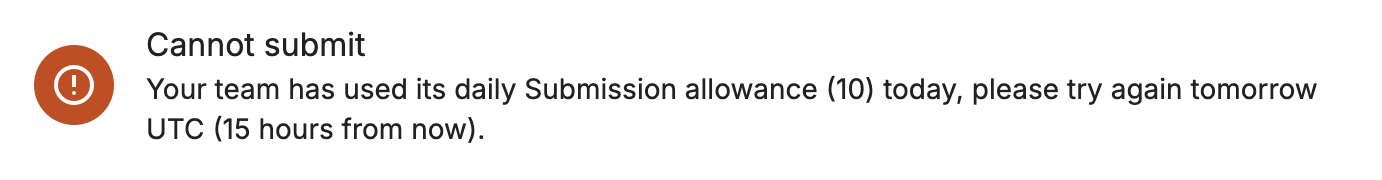
---
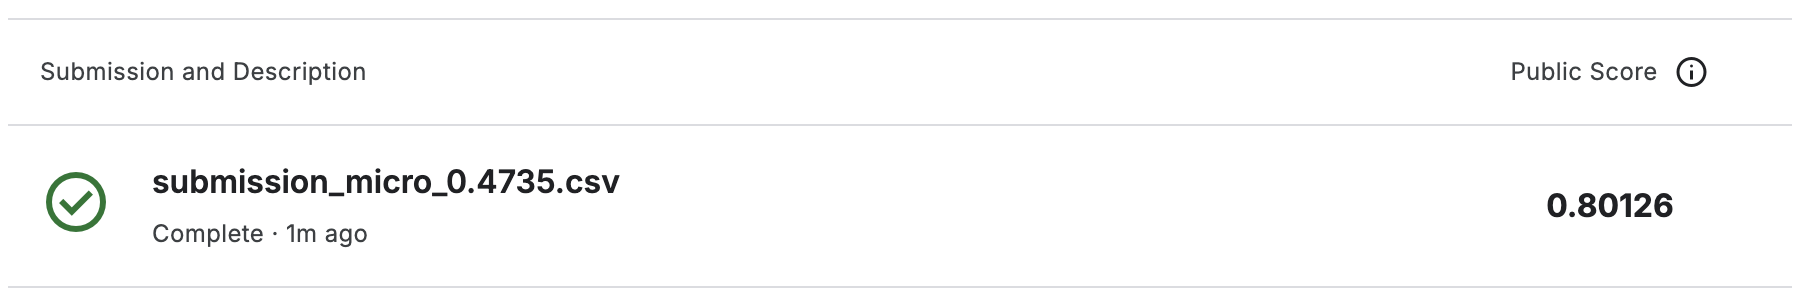
---

---
## 7. 회고
목표치를 위해 계속 시도했지만, 초과로 인해 더이상 접근 불가했습니다. 시간이 부족해서 아쉬웠고, 적은 시간대비 효율을 위해 gpt 활용도도 높았기에 추가적인 학습이 많이 필요한 상황입니다.